# Part II - Users of Ford Gobike System Data
## by (Akachukwu Ordu)

## Investigation Overview

We are learning about the users of the ford Gobike to help serve them better. taking note that time and days of the week show that a high number of our users are working class. 



## Dataset Overview

A data set of users of Gobike with 16 attributes that informs us of the users of this service.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import calendar

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gb = pd.read_csv('201902-Fordgobike-Tripdata.csv')

In [3]:
# copy of data frame 
fgb = gb

# elemenate the NAN Values 
fgb = fgb.dropna()

# Testing 
fgb.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [4]:
# Create duration_in_minute variable
fgb["duration_in_minute"] = round(fgb.duration_sec/60,2)

#extract the value of start hour and end hour from start_time
fgb['start_hour']= pd.DatetimeIndex(fgb['start_time']).hour

#extract the value of start hour and end hour from start_time
fgb['end_hour']= pd.DatetimeIndex(fgb['end_time']).hour

#extact age of the rider using birth year column
now = datetime.now()
fgb['age'] = now.year - fgb['member_birth_year']
fgb['age'] = fgb.age.fillna(0.0).astype(int)

In [5]:
# changing the start_time and end_time to date instead of integer 
fgb.start_time = pd.to_datetime(fgb.start_time)

fgb.end_time = pd.to_datetime(fgb.end_time)

# extract the day from start_time and adding the day_column
fgb['day'] = fgb.start_time.dt.dayofweek 

In [6]:
#replacing the days in numbers to string week days 
fgb.day.replace([0,1,2,3,4,5,6],["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],inplace=True)

In [7]:
# convert into ordered categorical types

ordinal_var_dict = {'day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fgb[var] = fgb[var].astype(ordered_var)

## Gender distribution and Duration of bike usage in minutes
This explains the time taken on single trips on the bike broken down into gender.


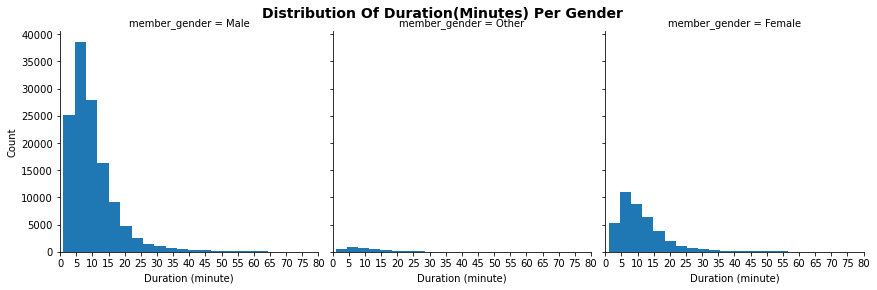

In [8]:
# using facetting for plotting the distribution of duration of each gender
tick = list(range(81))
g = sb.FacetGrid(data = fgb, col = 'member_gender', height = 4)
g.map(plt.hist, 'duration_in_minute', bins = 400)
plt.xlim((0,80))
plt.xticks(tick[::5])
g.set_xlabels('Duration (minute)')
g.set_ylabels('Count')
plt.suptitle("Distribution of Duration(minutes) Per Gender".title(),y=1, fontsize = 14, weight = "bold");

plt.show()

## Age range of users
- You see that majority of our users are between the ages 25 and 45 years of age. which a histogram graph explains clearly.



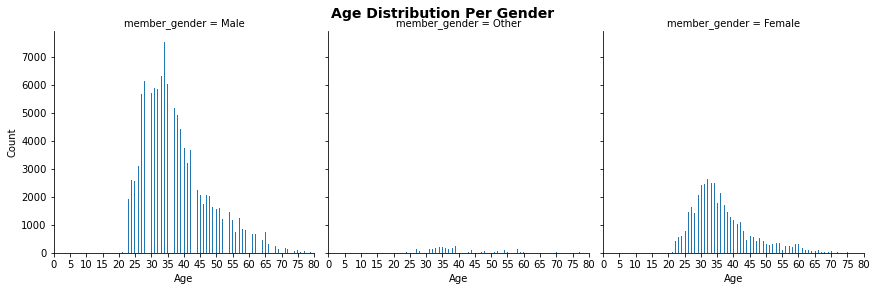

In [9]:
tick = list(range(81))
g = sb.FacetGrid(data = fgb, col = 'member_gender', height = 4)
g.map(plt.hist, 'age', bins = 400)
plt.xlim((0,80))
plt.xticks(tick[::5])
g.set_xlabels('Age')
g.set_ylabels('Count')
plt.suptitle("Age Distribution Per Gender".title(),y=1, fontsize = 14, weight = "bold");
plt.show()

## What Time of Day are the bikes most used
Below you would see the hours the bikes are used the most which is 8am and 5pm. Which makes its safe to say they go to work with the bike and use it to get back home as well.



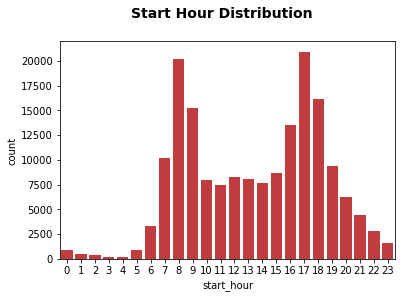

In [29]:
#plotting the day hours distribution
basic = sb.color_palette()[3]

sb.countplot(data=fgb, x='start_hour', color= basic);
g.set_xlabels('Start Hour')
g.set_ylabels('Count')
plt.suptitle("Start Hour Distribution".title(),y=1, fontsize = 14, weight = "bold");
plt.show()

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt